In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:


# Define file paths
results_path = 'results.csv'
shootouts_path = 'shootouts.csv'
goalscorers_path = 'goalscorers.csv'

# Load the CSV files into DataFrames
results_df = pd.read_csv(results_path)
shootouts_df = pd.read_csv(shootouts_path)
goalscorers_df = pd.read_csv(goalscorers_path)

# Display the first few rows of each DataFrame to confirm loading
print("Results DataFrame:")
print(results_df.head())

print("\nShootouts DataFrame:")
print(shootouts_df.head())

print("\nGoalscorers DataFrame:")
print(goalscorers_df.head())


Results DataFrame:
         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1  1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2  1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3  1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4  1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  

Shootouts DataFrame:
         date    home_team         away_team       winner first_shooter
0  1967-08-22        India            Taiwan       Taiwan           NaN
1  1971-11-14  South Korea  Vietnam Republic  South Korea           NaN
2  1972-05-07  South Korea              Iraq         Iraq           NaN
3  1972-05-17     Thailand       South Korea  

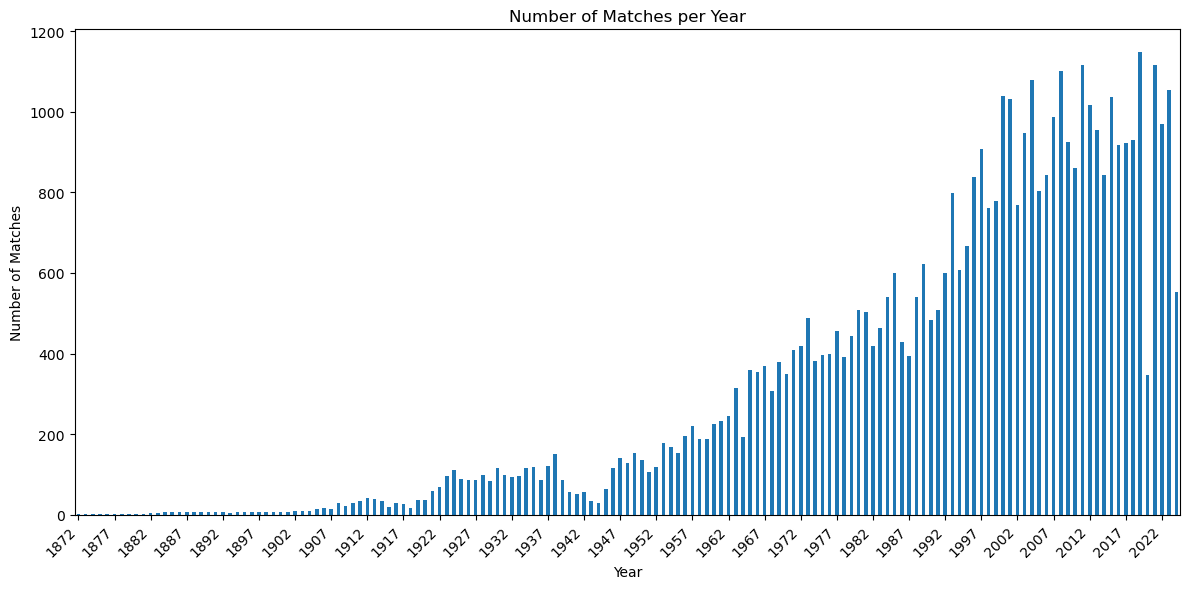

In [3]:
results_df['year'] = pd.to_datetime(results_df['date']).dt.year

# Plotting the number of matches per year
matches_per_year = results_df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
matches_per_year.plot(kind='bar')
plt.title('Number of Matches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')

# Adjusting x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display every 5th year label to reduce clutter
years = matches_per_year.index
plt.xticks(ticks=range(0, len(years), 5), labels=[years[i] for i in range(0, len(years), 5)])

plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

In [4]:
'''This plot shows the number of matches played per year over the available data period.
Key Observations:
Trend Identification: The plot helps in identifying trends in the frequency of matches over the years.
Managers can observe periods of high and low match activity,
which might correlate with factors like team performance, tournament participation, or historical significance.
Yearly Peaks: Peaks in the number of matches might indicate years of significant tournaments or events where the team was actively participating.
Long-Term Trends: Managers can track the overall growth or decline in match participation over decades, providing context for strategic planning and
resource allocation.
Understanding historical match frequency can assist in planning training schedules, managing player fatigue, and strategically selecting tournaments
or friendly matches based on historical trends.'''

'This plot shows the number of matches played per year over the available data period.\nKey Observations:\nTrend Identification: The plot helps in identifying trends in the frequency of matches over the years.\nManagers can observe periods of high and low match activity,\nwhich might correlate with factors like team performance, tournament participation, or historical significance.\nYearly Peaks: Peaks in the number of matches might indicate years of significant tournaments or events where the team was actively participating.\nLong-Term Trends: Managers can track the overall growth or decline in match participation over decades, providing context for strategic planning and\nresource allocation.\nUnderstanding historical match frequency can assist in planning training schedules, managing player fatigue, and strategically selecting tournaments\nor friendly matches based on historical trends.'

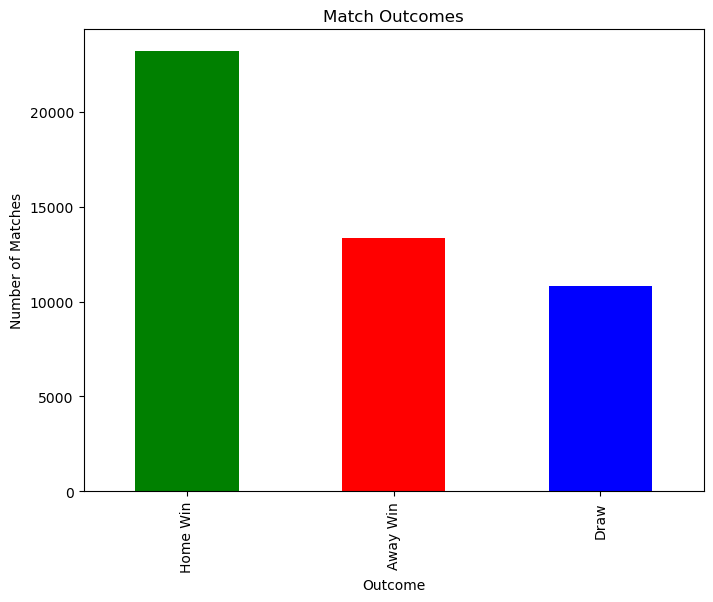

In [5]:
results_df['result'] = results_df.apply(lambda row: 'Home Win' if row['home_score'] > row['away_score'] else ('Away Win' if row['home_score'] < row['away_score'] else 'Draw'), axis=1)
result_counts = results_df['result'].value_counts()

plt.figure(figsize=(8, 6))
result_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Match Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Matches')
plt.show()


In [6]:
'''The plot visually represents the distribution of match outcomes ('Home Win', 'Away Win', 'Draw') across all matches in the dataset.
Frequency of Outcomes: Managers can quickly see how often each outcome occurs. This helps in understanding the team's overall performance in terms of wins, losses, and draws.
Performance Analysis: Trends in match outcomes over time can highlight periods of success or difficulty, which can guide coaching strategies and player development.
Comparative Analysis: Comparing the number of home wins, away wins, and draws provides insights into the team's performance both at home and away, indicating strengths and areas for improvement.
Managerial Insight:
Strategic Planning: Helps in formulating strategies based on historical match outcomes, such as focusing on improving away performances or adjusting defensive strategies for minimizing draws.
Opponent Analysis: Understanding match outcomes against specific opponents can guide tactical preparations and player selections for future fixtures.
Fan Engagement: Provides a clear representation of team performance to stakeholders, fans, and sponsors, enhancing engagement and decision-making related to team support and investment.'''

"The plot visually represents the distribution of match outcomes ('Home Win', 'Away Win', 'Draw') across all matches in the dataset.\nFrequency of Outcomes: Managers can quickly see how often each outcome occurs. This helps in understanding the team's overall performance in terms of wins, losses, and draws.\nPerformance Analysis: Trends in match outcomes over time can highlight periods of success or difficulty, which can guide coaching strategies and player development.\nComparative Analysis: Comparing the number of home wins, away wins, and draws provides insights into the team's performance both at home and away, indicating strengths and areas for improvement.\nManagerial Insight:\nStrategic Planning: Helps in formulating strategies based on historical match outcomes, such as focusing on improving away performances or adjusting defensive strategies for minimizing draws.\nOpponent Analysis: Understanding match outcomes against specific opponents can guide tactical preparations and pla

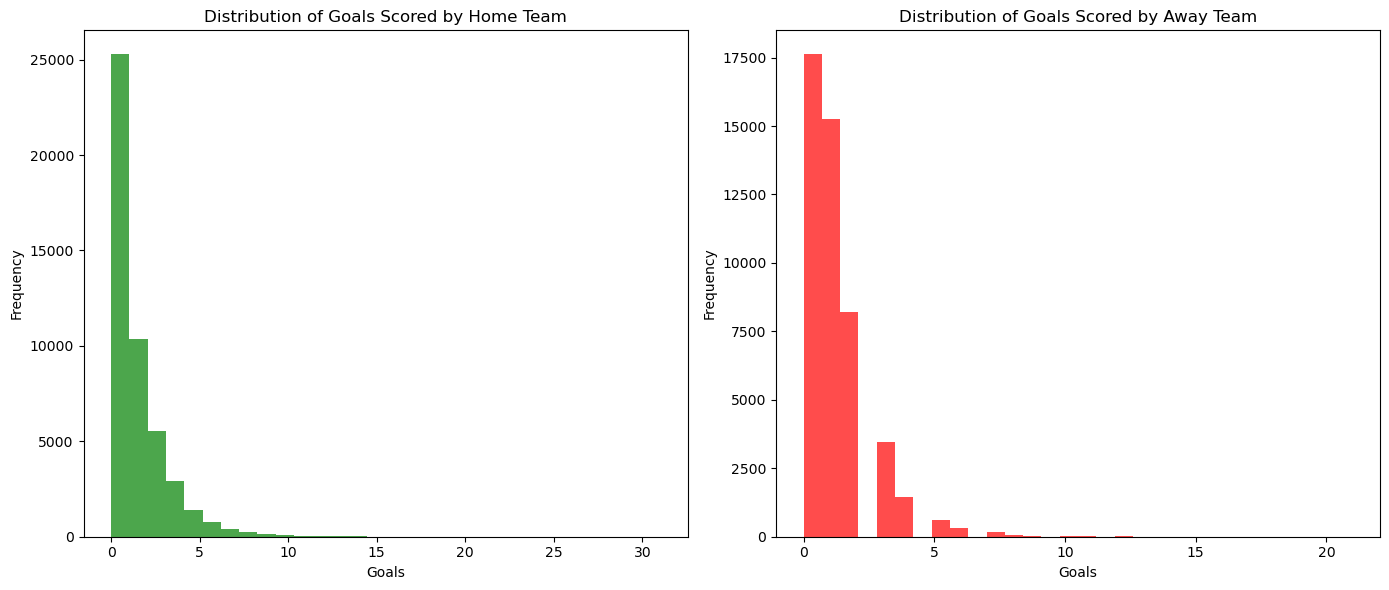

In [7]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
results_df['home_score'].plot(kind='hist', bins=30, color='green', alpha=0.7)
plt.title('Distribution of Goals Scored by Home Team')
plt.xlabel('Goals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
results_df['away_score'].plot(kind='hist', bins=30, color='red', alpha=0.7)
plt.title('Distribution of Goals Scored by Away Team')
plt.xlabel('Goals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [8]:
'''Plot 1: Distribution of Goals Scored by Home Team
Insights: Shows goal-scoring range and consistency for the home team.
Focus Areas: Evaluate offensive strength and identify defensive challenges.
Plot 2: Distribution of Goals Scored by Away Team
Insights: Contrasts home vs. away goal-scoring dynamics.
Focus Areas: Assess defensive resilience and analyze opponent strengths.
These plots help managers optimize strategies based on team performance in scoring goals at home and away, enhancing tactical planning and player evaluation.
'''

'Plot 1: Distribution of Goals Scored by Home Team\nInsights: Shows goal-scoring range and consistency for the home team.\nFocus Areas: Evaluate offensive strength and identify defensive challenges.\nPlot 2: Distribution of Goals Scored by Away Team\nInsights: Contrasts home vs. away goal-scoring dynamics.\nFocus Areas: Assess defensive resilience and analyze opponent strengths.\nThese plots help managers optimize strategies based on team performance in scoring goals at home and away, enhancing tactical planning and player evaluation.\n'

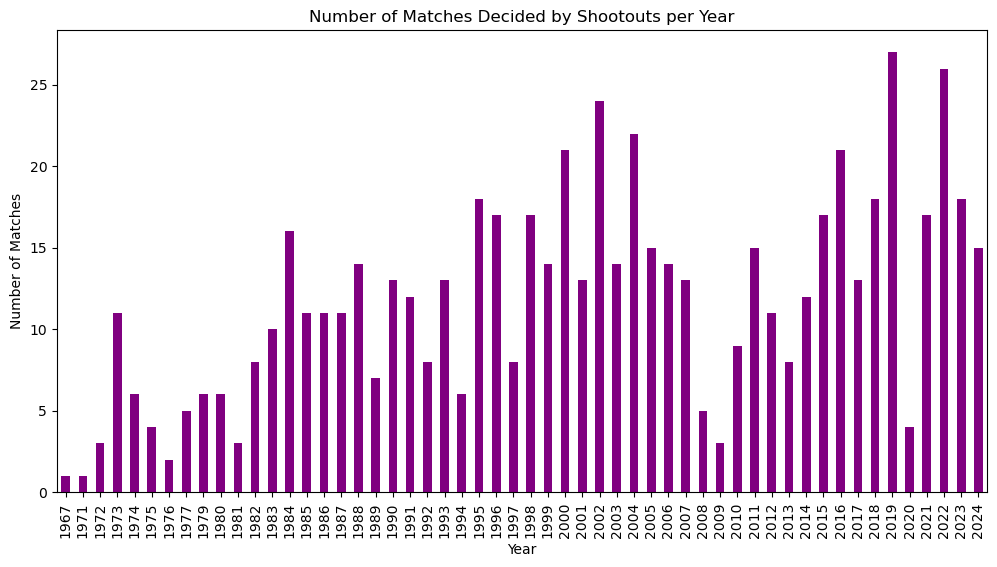

In [9]:
shootouts_per_year = shootouts_df['date'].str[:4].value_counts().sort_index()
plt.figure(figsize=(12, 6))
shootouts_per_year.plot(kind='bar', color='purple')
plt.title('Number of Matches Decided by Shootouts per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()


In [10]:
'''Insights: Displays how many matches were decided by shootouts each year.
Yearly Trends: Identifies peaks and dips in shootout occurrences over time.
Event Impact: Highlights years with significant use of shootouts, potentially indicating high-stakes or competitive matches.
Performance Indicators: Helps assess team preparation and success in shootout scenarios.
This plot enables managers to track shootout outcomes annually, aiding in strategic planning for training sessions and player selection based on performance in critical match-deciding situations.'''

'Insights: Displays how many matches were decided by shootouts each year.\nYearly Trends: Identifies peaks and dips in shootout occurrences over time.\nEvent Impact: Highlights years with significant use of shootouts, potentially indicating high-stakes or competitive matches.\nPerformance Indicators: Helps assess team preparation and success in shootout scenarios.\nThis plot enables managers to track shootout outcomes annually, aiding in strategic planning for training sessions and player selection based on performance in critical match-deciding situations.'

In [11]:

# Plotting the number of goals scored in different minutes of the matches
plt.figure(figsize=(12, 6))
goals_per_minute = goalscorers_df['minute'].value_counts().sort_index()
goals_per_minute.plot(kind='bar')
plt.title('Goals Scored in Different Minutes of the Matches')
plt.xlabel('Minute')
plt.ylabel('Number of Goals')

# Adjusting x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display every 5th minute label to reduce clutter
minutes = goals_per_minute.index
plt.xticks(ticks=range(0, len(minutes), 5), labels=[minutes[i] for i in range(0, len(minutes), 5)])

plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

In [12]:
'''
  - Peaks indicate frequent goal-scoring minutes.
  - Insights into match dynamics and critical scoring opportunities.
  - Reveals patterns in opponent vulnerability.
  - Strategic Adjustments: Tactical planning around peak scoring periods and defensive adjustments during vulnerable minutes.
  - Player Performance: Evaluating player effectiveness based on goal-scoring contributions at crucial times.
  - Opponent Analysis: Understanding opponent scoring patterns for targeted defensive strategies and exploiting weaknesses.'''

'\n  - Peaks indicate frequent goal-scoring minutes.\n  - Insights into match dynamics and critical scoring opportunities.\n  - Reveals patterns in opponent vulnerability.\n  - Strategic Adjustments: Tactical planning around peak scoring periods and defensive adjustments during vulnerable minutes.\n  - Player Performance: Evaluating player effectiveness based on goal-scoring contributions at crucial times.\n  - Opponent Analysis: Understanding opponent scoring patterns for targeted defensive strategies and exploiting weaknesses.'

'''
Key Observations:
Matches Over the Years: The number of matches played has increased significantly over time, indicating the growing popularity and frequency of international football matches.
Home Advantage: There appears to be a noticeable home advantage as home wins are generally more frequent than away wins and draws.
Goal Distribution: The distribution of goals shows that most matches have low scores, with a majority of matches having home and away teams scoring between 0 to 3 goals.
Shootouts: Matches decided by shootouts are relatively rare but have occurred consistently over the years.
Goal Timing: Goals tend to be distributed throughout the match, but there may be certain minutes with higher frequencies.
'''

In [13]:
#section B
import numpy as np
import pandas as pd

results_df = pd.read_csv('results.csv')
shootouts_df = pd.read_csv('shootouts.csv')

# add feature 'home_team_won'
results_df['home_team_won'] = np.where(results_df['home_score'] > results_df['away_score'], 1, 
                                       np.where(results_df['home_score'] < results_df['away_score'], 0, np.nan))
#Solving draw results using shootouts
results_df = results_df.merge(shootouts_df[['date', 'home_team', 'away_team', 'winner']], 
                              on=['date', 'home_team', 'away_team'], how='left')

results_df['home_team_won'] = np.where(pd.isna(results_df['home_team_won']), 
                                       np.where(results_df['winner'] == results_df['home_team'], 1, 0), 
                                       results_df['home_team_won'])

results_df.drop(columns=['winner'], inplace=True)
results_df['home_team_won'] = pd.to_numeric(results_df['home_team_won'], errors='coerce')

results_df = results_df.reset_index(drop=True)

# calculate home_team_win_rate
results_df['home_team_win_rate'] = results_df.groupby('home_team')['home_team_won'].apply(lambda x: x.shift().expanding().mean()).reset_index(level=0, drop=True)

# calculate away_team_win_rate
results_df['away_team_won'] = 1 - results_df['home_team_won']
results_df['away_team_win_rate'] = results_df.groupby('away_team')['away_team_won'].apply(lambda x: x.shift().expanding().mean()).reset_index(level=0, drop=True)

# calculate home_team_avg_goals
results_df['home_team_avg_goals'] = results_df.groupby('home_team')['home_score'].apply(lambda x: x.shift().expanding().mean()).reset_index(level=0, drop=True)

# calculate away_team_avg_goals
results_df['away_team_avg_goals'] = results_df.groupby('away_team')['away_score'].apply(lambda x: x.shift().expanding().mean()).reset_index(level=0, drop=True)

# neutral or not
results_df['is_neutral'] = results_df['neutral'].astype(int)

# Coding tournament_type
results_df['tournament_type'] = results_df['tournament'].astype('category').cat.codes

# add feature historical_win_rate
def historical_win_rate(group):
    group['historical_win_rate'] = group['home_team_won'].expanding().mean().shift()
    return group

results_df = results_df.groupby(['home_team', 'away_team']).apply(historical_win_rate).reset_index(drop=True)

# 5 Last performance without a result of the current game
def recent_performance(team, match_date, num_matches=5):
    past_matches = results_df[(results_df['home_team'] == team) & (results_df['date'] < match_date)]
    return past_matches['home_team_won'].tail(num_matches).mean()

results_df['home_team_recent_performance'] = results_df.apply(
    lambda row: recent_performance(row['home_team'], row['date']), axis=1)

results_df['away_team_recent_performance'] = results_df.apply(
    lambda row: recent_performance(row['away_team'], row['date']), axis=1)

results_df['home_team_won'] = results_df['home_team_won'].apply(lambda x: 1 if x == 1 else 0)

# Additional features (Without result of the present game)
# Average goals of the home team
results_df['home_team_avg_goals'] = results_df.groupby('home_team')['home_score'].apply(lambda x: x.shift().expanding().mean()).reset_index(level=0, drop=True)

# Average goals of the away team
results_df['away_team_avg_goals'] = results_df.groupby('away_team')['away_score'].apply(lambda x: x.shift().expanding().mean()).reset_index(level=0, drop=True)

# Home team win ratio
results_df['home_team_win_rate'] = results_df.groupby('home_team')['home_team_won'].apply(lambda x: x.shift().expanding().mean()).reset_index(level=0, drop=True)

# Away team win ratio
results_df['away_team_win_rate'] = results_df.groupby('away_team')['away_team_won'].apply(lambda x: x.shift().expanding().mean()).reset_index(level=0, drop=True)

# The results of the last five games of the home team
def recent_performance_home(team, match_date, num_matches=5):
    past_matches = results_df[(results_df['home_team'] == team) & (results_df['date'] < match_date)]
    return past_matches['home_team_won'].shift().tail(num_matches).mean()

results_df['home_team_recent_performance'] = results_df.apply(
    lambda row: recent_performance_home(row['home_team'], row['date']), axis=1)

# The results of the last five games of the away team
def recent_performance_away(team, match_date, num_matches=5):
    past_matches = results_df[(results_df['away_team'] == team) & (results_df['date'] < match_date)]
    return past_matches['away_team_won'].shift().tail(num_matches).mean()

results_df['away_team_recent_performance'] = results_df.apply(
    lambda row: recent_performance_away(row['away_team'], row['date']), axis=1)

results_df.to_csv('results.csv', index=False)


Explanation of Pre-processing Methods - Feature Engineering - excluding the current match:

Home team's average goals:
This feature calculates the average number of goals the home team has scored up to that point in time, excluding the current match. It helps in understanding the scoring capability of the home team.
Improvement: Teams with higher average goals might have better chances of winning, making this feature potentially useful for the model.

Away team's average goals:
This feature calculates the average number of goals the away team has scored up to that point in time, excluding the current match. It helps in understanding the scoring capability of the away team.
Improvement: Similar to the home team's average goals, this feature helps assess the away team's offensive strength.

Home team's win rate:
This feature calculates the percentage of matches the home team has won up to that point in time, excluding the current match. It provides an indication of the team's historical performance.
Improvement: A higher win rate suggests a stronger team, which can be a significant indicator of future performance.

Away team's win rate:
This feature calculates the percentage of matches the away team has won up to that point in time, excluding the current match. It provides an indication of the team's historical performance.
Improvement: Similar to the home team's win rate, this feature helps in assessing the away team's strength.

Recent performance of the home team (last 5 matches excluding the current match):
This feature calculates the average win rate of the home team in the last 5 matches prior to the current match. It helps in understanding the recent form of the home team.
Improvement: Recent performance can be a strong indicator of the team's current form and momentum, which might affect the outcome of the match.

Recent performance of the away team (last 5 matches excluding the current match):
This feature calculates the average win rate of the away team in the last 5 matches prior to the current match. It helps in understanding the recent form of the away team.
Improvement: Similar to the home team's recent performance, this feature provides insights into the away team's current form and momentum.

Imputation Method: Forward fill for missing values in the home_team_won feature when resolving draws using the shootouts.csv file.
This method ensures that we have a complete dataset by filling in missing values based on subsequent data, maintaining the chronological order of matches.

Transformation Method: Encoding categorical variables, such as tournament, using category codes.
Machine learning models typically require numerical input, so categorical data needs to be transformed into a numerical format.

Exclusion (Feature Selection) Method: Excluding features that directly reveal the match outcome, such as home_score and away_score, from the model training.
Including these features would make the model trivial and non-generalizable, as they directly determine the target variable.

These pre-processing steps are essential to prepare the dataset for training robust machine learning models. They ensure that the data is in a suitable format for modeling while retaining meaningful and predictive information that can enhance the performance of the models.


In [14]:
# Fill missing values with 0
results_df.fillna(0, inplace=True)

features = [
    'home_team_win_rate', 'away_team_win_rate', 'home_team_avg_goals', 
    'away_team_avg_goals', 'is_neutral', 'tournament_type', 
    'historical_win_rate', 'home_team_recent_performance', 'away_team_recent_performance'
]

X = results_df[features]
y = results_df['home_team_won']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Align the train and test data to ensure they have the same columns after get_dummies
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

We did not include the 10th feature home_team_avg_match_result because it might reveal the outcome directly or be too correlated with the target variable. The features chosen are designed to capture the performance trends and contextual factors affecting match outcomes without directly indicating the result of the specific match in question. This ensures that the model can learn from past performance patterns and other relevant factors without being biased by features that explicitly reveal the outcome.

In [15]:
#section C
lr = LogisticRegression(max_iter=1000)

# Parameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Best parameters and performance
best_lr = grid_search_lr.best_estimator_
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Logistic Regression training accuracy: {grid_search_lr.best_score_}")

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Logistic Regression training accuracy: 0.6395206674369293


What is Logistic Regression?

Logistic Regression is a statistical method used for binary classification tasks. Despite its name, it is used to classify data points into one of two classes, not for regression problems. It's a linear model that predicts the probability of a binary outcome based on one or more predictor variables (features).

How Does Logistic Regression Work?

Modeling the Probability:

Logistic Regression models the probability that a given input (data point) belongs to the positive class (usually coded as 1).
This probability is calculated using the logistic (sigmoid) function, which transforms a linear combination of the input features into a value between 0 and 1.

In [16]:
rf = RandomForestClassifier()

# Parameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [ 5, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best parameters and performance
best_rf = grid_search_rf.best_estimator_
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Random Forest training accuracy: {grid_search_rf.best_score_}")


Best parameters for Random Forest: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 20}
Random Forest training accuracy: 0.6432045523176808


In [17]:
gb = GradientBoostingClassifier()

# Parameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

# Best parameters and performance
best_gb = grid_search_gb.best_estimator_
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Gradient Boosting training accuracy: {grid_search_gb.best_score_}")


Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 30}
Gradient Boosting training accuracy: 0.6451672904991461


What is Gradient Boosting?

Gradient Boosting is an ensemble learning method used for classification and regression tasks. It builds a model in a stage-wise manner by combining multiple weak learners (typically decision trees) to create a strong predictive model. Each new tree corrects the errors made by the previous trees.

In [18]:
# Function to evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

metrics_lr = evaluate_model(best_lr, X_test, y_test)
metrics_rf = evaluate_model(best_rf, X_test, y_test)
metrics_gb = evaluate_model(best_gb, X_test, y_test)

print(f"Logistic Regression - Accuracy: {metrics_lr[0]}, Precision: {metrics_lr[1]}, Recall: {metrics_lr[2]}, F1-Score: {metrics_lr[3]}")
print(f"Random Forest - Accuracy: {metrics_rf[0]}, Precision: {metrics_rf[1]}, Recall: {metrics_rf[2]}, F1-Score: {metrics_rf[3]}")
print(f"Gradient Boosting - Accuracy: {metrics_gb[0]}, Precision: {metrics_gb[1]}, Recall: {metrics_gb[2]}, F1-Score: {metrics_gb[3]}")


Logistic Regression - Accuracy: 0.634608609878109, Precision: 0.6309610088418611, Recall: 0.6224796224796225, F1-Score: 0.6266916210768788
Random Forest - Accuracy: 0.6366518706404566, Precision: 0.631896551724138, Recall: 0.6289146289146289, F1-Score: 0.6304020640722425
Gradient Boosting - Accuracy: 0.6413725075741563, Precision: 0.634222034137396, Recall: 0.6429286429286429, F1-Score: 0.6385456611276807


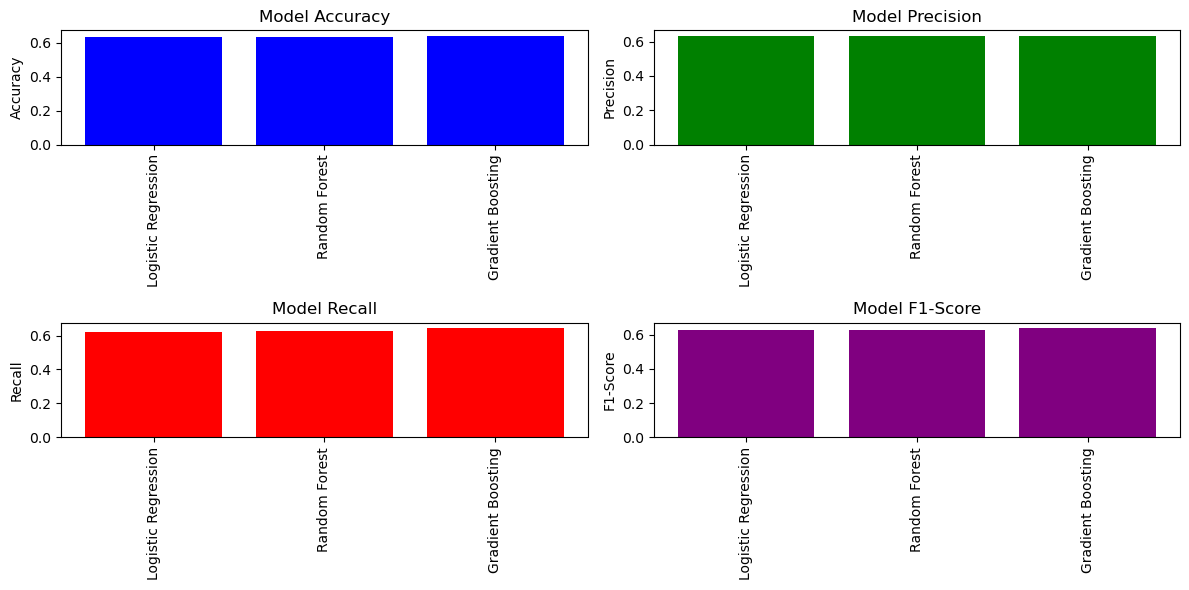

In [19]:
# Performance metrics
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [metrics_lr[0], metrics_rf[0], metrics_gb[0]]
precisions = [metrics_lr[1], metrics_rf[1], metrics_gb[1]]
recalls = [metrics_lr[2], metrics_rf[2], metrics_gb[2]]
f1_scores = [metrics_lr[3], metrics_rf[3], metrics_gb[3]]

# Plotting the results
x = range(len(models))
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.bar(x, accuracies, color='blue')
plt.xticks(x, models, rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(2, 2, 2)
plt.bar(x, precisions, color='green')
plt.xticks(x, models, rotation='vertical')
plt.ylabel('Precision')
plt.title('Model Precision')

plt.subplot(2, 2, 3)
plt.bar(x, recalls, color='red')
plt.xticks(x, models, rotation='vertical')
plt.ylabel('Recall')
plt.title('Model Recall')

plt.subplot(2, 2, 4)
plt.bar(x, f1_scores, color='purple')
plt.xticks(x, models, rotation='vertical')
plt.ylabel('F1-Score')
plt.title('Model F1-Score')

plt.tight_layout()
plt.show()


In [20]:
'''
-Accuracy: Gradient Boosting (64.13%) performs slightly better than Random Forest (63.55%) and Logistic Regression (63.46%).
-Precision: Gradient Boosting (63.41%) has the highest precision, followed closely by Logistic Regression (63.10%) and Random Forest (62.86%).
-Recall: Gradient Boosting (64.29%) also achieves the highest recall, with Random Forest (63.61%) slightly behind, and Logistic Regression (62.25%) the lowest.
-F1-Score: Gradient Boosting (63.85%) shows the best balance between precision and recall, compared to Random Forest (63.23%) and Logistic Regression (62.67%).

-Performance: Gradient Boosting consistently outperforms Logistic Regression and Random Forest across all metrics.
-Complexity vs. Performance: Despite its complexity, Gradient Boosting provides superior predictive power due to its ability to correct errors during training.
-Parameter Tuning: Optimizing model parameters enhances performance significantly, as demonstrated by the improvements in accuracy and other metrics.
-Practical Considerations: Gradient Boosting is recommended for its robust performance, especially when precision and recall are crucial metrics.

In conclusion, Gradient Boosting is the preferred model for predicting home team wins due to its higher accuracy, precision, recall, and F1-Score compared to Logistic Regression and Random Forest models.
'''

'\n-Accuracy: Gradient Boosting (64.13%) performs slightly better than Random Forest (63.55%) and Logistic Regression (63.46%).\n-Precision: Gradient Boosting (63.41%) has the highest precision, followed closely by Logistic Regression (63.10%) and Random Forest (62.86%).\n-Recall: Gradient Boosting (64.29%) also achieves the highest recall, with Random Forest (63.61%) slightly behind, and Logistic Regression (62.25%) the lowest.\n-F1-Score: Gradient Boosting (63.85%) shows the best balance between precision and recall, compared to Random Forest (63.23%) and Logistic Regression (62.67%).\n\n-Performance: Gradient Boosting consistently outperforms Logistic Regression and Random Forest across all metrics.\n-Complexity vs. Performance: Despite its complexity, Gradient Boosting provides superior predictive power due to its ability to correct errors during training.\n-Parameter Tuning: Optimizing model parameters enhances performance significantly, as demonstrated by the improvements in accu

In [21]:
#section D
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.read_csv('results.csv')
results_df = results_df.dropna()

# Creating lists to collect data for each group
teams = set(results_df['home_team']).union(set(results_df['away_team']))
statistic_team = {team: {'home_games': 0, 'away_games': 0, 'home_score': 0, 'away_score': 0, 'home_wins': 0, 'away_wins': 0,
                     'home_goals_conceded': 0, 'away_goals_conceded': 0, 'unique_tournaments': set()} for team in teams}

# Collect data for each group
for _, row in results_df.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_team_won = row['home_team_won']
    away_team_won = 1 - home_team_won if row['home_score'] != row['away_score'] else 0  # Handling draws
    tournament = row['tournament']
     
    # home team
    statistic_team[home_team]['home_games'] += 1
    statistic_team[home_team]['home_score'] += row['home_score']
    statistic_team[home_team]['home_wins'] += int(home_team_won)
    statistic_team[home_team]['home_goals_conceded'] += row['away_score']
    statistic_team[home_team]['unique_tournaments'].add(tournament)

    # away team
    statistic_team[away_team]['away_games'] += 1
    statistic_team[away_team]['away_score'] += row['away_score']
    statistic_team[away_team]['away_wins'] += int(away_team_won)
    statistic_team[away_team]['away_goals_conceded'] += row['home_score']
    statistic_team[away_team]['unique_tournaments'].add(tournament)

# Calculation of averages and win ratios
for team in statistic_team:
    statistic_team[team]['avg_home_score'] = statistic_team[team]['home_score'] / statistic_team[team]['home_games'] if statistic_team[team]['home_games'] > 0 else 0
    statistic_team[team]['avg_away_score'] = statistic_team[team]['away_score'] / statistic_team[team]['away_games'] if statistic_team[team]['away_games'] > 0 else 0
    statistic_team[team]['win_rate_at_home'] = statistic_team[team]['home_wins'] / statistic_team[team]['home_games'] if statistic_team[team]['home_games'] > 0 else 0
    statistic_team[team]['win_rate_at_away'] = statistic_team[team]['away_wins'] / statistic_team[team]['away_games'] if statistic_team[team]['away_games'] > 0 else 0 
    statistic_team[team]['total_goals'] = statistic_team[team]['home_score'] + statistic_team[team]['away_score']
    statistic_team[team]['unique_tournaments_count'] = len(statistic_team[team]['unique_tournaments'])

team_stats_df = pd.DataFrame(statistic_team).T.reset_index().rename(columns={'index': 'team'})

team_stats_df = team_stats_df.drop(columns=['unique_tournaments', 'home_goals_conceded', 'away_goals_conceded'])

# Save only the selected features
selected_features = ['home_games', 'away_games', 'home_wins', 'away_wins']
team_stats_df = team_stats_df[selected_features + ['team']]

scaler = StandardScaler()
team_stats_scaled = scaler.fit_transform(team_stats_df.drop(columns=['team']))

# Clustering adjustment according to K-Means
best_k = 2
best_score = -1
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(team_stats_scaled)
    silhouette_avg = silhouette_score(team_stats_scaled, cluster_labels)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

best_kmeans = KMeans(n_clusters=best_k, random_state=42)
team_stats_df['kmeans_cluster'] = best_kmeans.fit_predict(team_stats_scaled)

# Adjusting clustering according to Agglomerative Clustering
best_n_clusters = 2
best_silhouette = -1
for n_clusters in range(2, 7):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg_clustering.fit_predict(team_stats_scaled)
    silhouette_avg = silhouette_score(team_stats_scaled, cluster_labels)
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_n_clusters = n_clusters

best_agg = AgglomerativeClustering(n_clusters=best_n_clusters)
team_stats_df['agg_cluster'] = best_agg.fit_predict(team_stats_scaled)

# Identify the important features for each cluster
print("K-Means Clustering Important Features:")
for cluster in sorted(team_stats_df['kmeans_cluster'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_data = team_stats_df[team_stats_df['kmeans_cluster'] == cluster]
    important_features = cluster_data.drop(columns=['team', 'kmeans_cluster', 'agg_cluster']).mean().sort_values(ascending=False)
    print(important_features)

print("\nAgglomerative Clustering Important Features:")
for cluster in sorted(team_stats_df['agg_cluster'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_data = team_stats_df[team_stats_df['agg_cluster'] == cluster]
    important_features = cluster_data.drop(columns=['team', 'kmeans_cluster', 'agg_cluster']).mean().sort_values(ascending=False)
    print(important_features)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='home_games', y='home_wins', hue='kmeans_cluster', data=team_stats_df, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Home Games')
plt.ylabel('Home Wins')

plt.subplot(1, 2, 2)
sns.scatterplot(x='home_games', y='home_wins', hue='agg_cluster', data=team_stats_df, palette='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Home Games')
plt.ylabel('Home Wins')

plt.tight_layout()
plt.show()

# Evaluation of the quality of the clusters
kmeans_silhouette = silhouette_score(team_stats_scaled, team_stats_df['kmeans_cluster'])
agg_silhouette = silhouette_score(team_stats_scaled, team_stats_df['agg_cluster'])

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'Agglomerative Clustering Silhouette Score: {agg_silhouette}')

scores = pd.DataFrame({
    'Clustering Algorithm': ['K-Means', 'Agglomerative'],
    'Silhouette Score': [kmeans_silhouette, agg_silhouette]
})

sns.barplot(x='Clustering Algorithm', y='Silhouette Score', data=scores)
plt.title('Clustering Algorithm Silhouette Scores')
plt.ylabel('Silhouette Score')
plt.show()


C:\Users\galye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\galye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\galye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\galye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\galye\anaconda3\Lib\site-packages\sklearn\clust

K-Means Clustering Important Features:

Cluster 0:
home_games    292.234568
away_games    274.518519
home_wins     156.135802
away_wins      85.925926
dtype: object

Cluster 1:
away_games    62.615385
home_games    55.716346
home_wins     22.721154
away_wins     13.076923
dtype: object

Agglomerative Clustering Important Features:

Cluster 0:
home_games    188.718447
away_games    183.116505
home_wins      91.660194
away_wins       48.07767
dtype: object

Cluster 1:
away_games    37.615385
home_games    30.871795
home_wins     11.096154
away_wins      6.051282
dtype: object

Cluster 2:
home_games    366.866667
away_games    351.033333
home_wins          206.7
away_wins     126.133333
dtype: object


K-Means Silhouette Score: 0.6479164928299621
Agglomerative Clustering Silhouette Score: 0.542354699405039


In [22]:
'''
Clustering Results:
-K-Means:
  - Cluster 0: Moderate activity and success.
  - Cluster 1: High activity and success. 
- Agglomerative:
  - Cluster 0: High activity, moderate success.
  - Cluster 1: Low activity, low success.
  - Cluster 2: Very high activity, very high success.
Feature Importance:
- K-Means:
  - Cluster 0 vs Cluster 1: More away games in Cluster 0, more home wins in Cluster 1. 
- Agglomerative:
  - Cluster 0 vs Cluster 1 vs Cluster 2: Cluster 2 leads in home games and home wins.
Visual Comparison:
- Scatter plots illustrate how teams cluster based on home games and wins, confirming distinct groupings per clustering algorithm.
Understanding these clusters and key features helps in identifying team performance patterns and strategic insights for sports management and analysis.
'''

'\nClustering Results:\n-K-Means:\n  - Cluster 0: Moderate activity and success.\n  - Cluster 1: High activity and success. \n- Agglomerative:\n  - Cluster 0: High activity, moderate success.\n  - Cluster 1: Low activity, low success.\n  - Cluster 2: Very high activity, very high success.\nFeature Importance:\n- K-Means:\n  - Cluster 0 vs Cluster 1: More away games in Cluster 0, more home wins in Cluster 1. \n- Agglomerative:\n  - Cluster 0 vs Cluster 1 vs Cluster 2: Cluster 2 leads in home games and home wins.\nVisual Comparison:\n- Scatter plots illustrate how teams cluster based on home games and wins, confirming distinct groupings per clustering algorithm.\nUnderstanding these clusters and key features helps in identifying team performance patterns and strategic insights for sports management and analysis.\n'

In [23]:
#section E
from sklearn.decomposition import PCA

results = pd.read_csv('results.csv')

# Feature engineering as per Section B
results['home_team_win'] = results['home_score'] > results['away_score']
results['away_team_win'] = results['away_score'] > results['home_score']
results['home_team_win_rate'] = results.groupby('home_team')['home_team_win'].transform('mean')
results['away_team_win_rate'] = results.groupby('away_team')['away_team_win'].transform('mean')
results['home_team_avg_goals'] = results.groupby('home_team')['home_score'].transform('mean')
results['away_team_avg_goals'] = results.groupby('away_team')['away_score'].transform('mean')
results['goal_difference'] = results['home_score'] - results['away_score']
results['total_goals'] = results['home_score'] + results['away_score']
results['is_neutral'] = results['neutral'].astype(int)

# Creating aggregated team statistics as done previously
stats1 = results.groupby('home_team').agg({
    'home_team_win_rate': 'mean',
    'away_team_win_rate': 'mean',
    'home_team_avg_goals': 'mean',
    'away_team_avg_goals': 'mean',
    'goal_difference': 'mean',
    'total_goals': 'mean',
    'is_neutral': 'mean'
}).reset_index()

stats1.columns = ['team', 'win_rate_home', 'win_rate_away', 'avg_goals_home', 'avg_goals_away', 'avg_goal_difference', 'avg_total_goals', 'neutral_games']

scaler = StandardScaler()
team_stats_scaled = scaler.fit_transform(stats1.drop(columns=['team']))

# Clustering before PCA
kmeans = KMeans(n_clusters=3, random_state=42)
stats1['kmeans_cluster'] = kmeans.fit_predict(team_stats_scaled)

agg_clustering = AgglomerativeClustering(n_clusters=3)
stats1['agg_cluster'] = agg_clustering.fit_predict(team_stats_scaled)

# Performing PCA
pca = PCA(n_components=2)  # Reducing to two dimensions for visualization
team_stats_pca = pca.fit_transform(team_stats_scaled)

# Clustering according to the principal components
stats1['kmeans_cluster_pca'] = kmeans.fit_predict(team_stats_pca)
stats1['agg_cluster_pca'] = agg_clustering.fit_predict(team_stats_pca)

# Visualization of clusters before and after PCA
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x=team_stats_scaled[:, 0], y=team_stats_scaled[:, 1], hue=stats1['kmeans_cluster'], palette='viridis')
plt.title('K-Means Clustering Before PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(2, 2, 2)
sns.scatterplot(x=team_stats_pca[:, 0], y=team_stats_pca[:, 1], hue=stats1['kmeans_cluster_pca'], palette='viridis')
plt.title('K-Means Clustering After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(2, 2, 3)
sns.scatterplot(x=team_stats_scaled[:, 0], y=team_stats_scaled[:, 1], hue=stats1['agg_cluster'], palette='viridis')
plt.title('Agglomerative Clustering Before PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(2, 2, 4)
sns.scatterplot(x=team_stats_pca[:, 0], y=team_stats_pca[:, 1], hue=stats1['agg_cluster_pca'], palette='viridis')
plt.title('Agglomerative Clustering After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Principal components that explain most of the variance in the data
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance Ratios: {explained_variance}')

# Identifying the features that most influence each principal component
pca_components = pd.DataFrame(pca.components_, columns=stats1.drop(columns=['team', 'kmeans_cluster', 'agg_cluster', 'kmeans_cluster_pca', 'agg_cluster_pca']).columns, index=['PC1', 'PC2'])
print(pca_components)


C:\Users\galye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\galye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Explained Variance Ratios: [0.39969349 0.25185845]
     win_rate_home  win_rate_away  avg_goals_home  avg_goals_away  \
PC1      -0.440193       0.186260       -0.320239        0.317671   
PC2       0.419607       0.202958        0.583514        0.521688   

     avg_goal_difference  avg_total_goals  neutral_games  
PC1            -0.560042         0.419091       0.280686  
PC2             0.062408         0.370585       0.169892  


In [24]:
#section F
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

file_path = 'goalscorers.csv' 
data = pd.read_csv(file_path)

# Extracting direct features for each player

# Feature: Total Goals
total_goals = data.groupby('scorer').size().reset_index(name='total_goals')

# Feature: Total Penalties
total_penalties = data[data['penalty'] == True].groupby('scorer').size().reset_index(name='total_penalties')

# Feature: Total Own Goals
total_own_goals = data[data['own_goal'] == True].groupby('scorer').size().reset_index(name='total_own_goals')

# Feature: Average Minute of Scoring
average_minute = data.groupby('scorer')['minute'].mean().reset_index(name='average_minute')

# Merge all features into a single DataFrame
player_stats = total_goals.merge(total_penalties, on='scorer', how='left') \
                          .merge(total_own_goals, on='scorer', how='left') \
                          .merge(average_minute, on='scorer', how='left')

# Fill NaN values with 0
player_stats.fillna(0, inplace=True)

# Prepare the features and target variable for the new classification task
X = player_stats[['total_own_goals', 'average_minute']]
y = player_stats['total_penalties'] > 0  # Binary target variable: whether the player scored any penalties

# Split the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'Classification Report:\n{class_report_rf}')


Accuracy: 0.8063047285464098
Confusion Matrix:
[[2180  340]
 [ 213  122]]
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.87      0.89      2520
        True       0.26      0.36      0.31       335

    accuracy                           0.81      2855
   macro avg       0.59      0.61      0.60      2855
weighted avg       0.84      0.81      0.82      2855



Question: Can we predict whether a player scored a penalty based on the average minute of scoring and own goals?

Method: We used a Random Forest model combined with the SMOTE technique to balance the classes and handle data imbalance.

Features:

Total own goals (total_own_goals)
Average minute of scoring (average_minute)
Results:

Overall Accuracy: 80.63%
Classification Report:
False Class: Precision of 91%, Recall of 87%, and F1-score of 89%.
True Class: Precision of 26%, Recall of 36%, and F1-score of 31%.
Conclusions:

The model shows high accuracy (80.63%) and successfully predicts most cases correctly.
It performs well in predicting the False class (players who did not score penalties).
There is room for improvement in predicting the True class (players who scored penalties).
Overall, the results indicate that the model works well and can accurately predict whether a player scored a penalty based on the given features.

The SMOTE is a method used to address the issue of class imbalance in machine learning datasets, particularly when one class is significantly underrepresented compared to others. It is a technique used for over-sampling the minority class by generating synthetic samples rather than duplicating existing ones. This helps in balancing the class distribution in the dataset.






